In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, header=None, names=col_names)
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
print((df == 0).sum())


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [3]:
# Columns where 0 is invalid
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with the median of each column
for col in cols_to_clean:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

# Confirm zeros are gone
print((df[cols_to_clean] == 0).sum())


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4909 - loss: 0.7260 - val_accuracy: 0.6179 - val_loss: 0.6700
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5962 - loss: 0.6577 - val_accuracy: 0.6504 - val_loss: 0.6237
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6897 - loss: 0.6080 - val_accuracy: 0.6585 - val_loss: 0.5913
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7168 - loss: 0.5755 - val_accuracy: 0.6748 - val_loss: 0.5685
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7107 - loss: 0.5387 - val_accuracy: 0.6748 - val_loss: 0.5496
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7492 - loss: 0.5202 - val_accuracy: 0.6748 - val_loss: 0.5348
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.5275 - val_accuracy: 0.6748 - val_loss: 0.5239
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7491 - loss: 0.4912 - val_accuracy: 0.6748 - val_loss: 0.5150
E

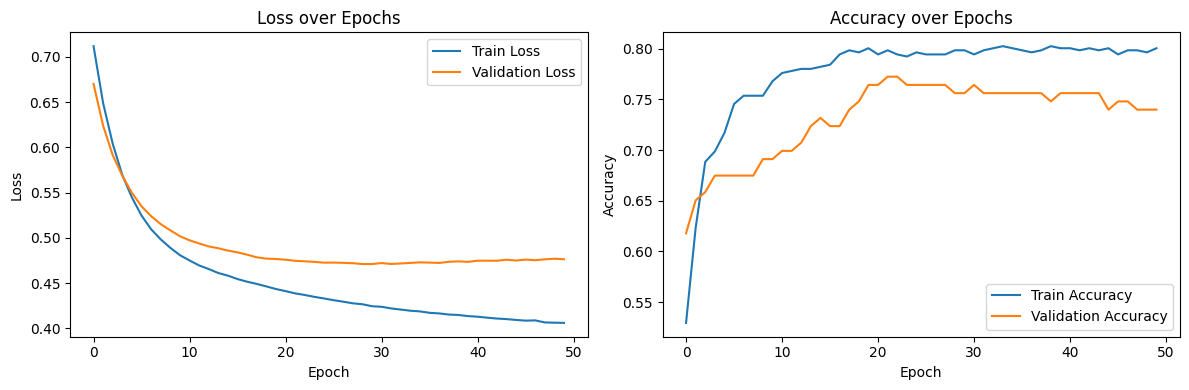

In [9]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
y_probs = model.predict(X_test)
y_pred = (y_probs >= 0.5).astype(int)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

# Confusion matrix (optional, but useful)
cm = confusion_matrix(y_test, y_pred)

# Show results
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


Precision: 0.63
Recall:    0.62
F1 Score:  0.62
Confusion Matrix:
[[79 20]
 [21 34]]


In [12]:
!pip install -q imbalanced-learn


In [13]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(500), np.int64(1): np.int64(500)}


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# New train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Rescale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Train the model again on the resampled (balanced) data
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7145 - loss: 0.5494 - val_accuracy: 0.7250 - val_loss: 0.5074
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7888 - loss: 0.4353 - val_accuracy: 0.7437 - val_loss: 0.4913
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7522 - loss: 0.4398 - val_accuracy: 0.7688 - val_loss: 0.4869
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7746 - loss: 0.4386 - val_accuracy: 0.7563 - val_loss: 0.4848
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7830 - loss: 0.4633 - val_accuracy: 0.7563 - val_loss: 0.4847
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7893 - loss: 0.4390 - val_accuracy: 0.7625 - val_loss: 0.4808
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7860 - loss: 0.4536 - val_accuracy: 0.7563 - val_loss: 0.4799
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7706 - loss: 0.4523 - val_accuracy: 0.7563 - val_loss

In [16]:
# Get predicted probabilities
y_probs = model.predict(X_test)

# Convert probabilities to class labels using 0.5 threshold
y_pred = (y_probs >= 0.5).astype(int)

# Import evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display results
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Precision: 0.75
Recall:    0.85
F1 Score:  0.80
Confusion Matrix:
[[70 29]
 [15 86]]


In [17]:
# Train the same model, but with a smaller batch size
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8050 - loss: 0.3933 - val_accuracy: 0.7875 - val_loss: 0.4578
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7920 - loss: 0.4278 - val_accuracy: 0.7875 - val_loss: 0.4577
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8208 - loss: 0.3967 - val_accuracy: 0.7812 - val_loss: 0.4570
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8231 - loss: 0.3764 - val_accuracy: 0.7937 - val_loss: 0.4555
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7989 - loss: 0.4174 - val_accuracy: 0.7937 - val_loss: 0.4579
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8109 - loss: 0.4162 - val_accuracy: 0.7937 - val_loss: 0.4562
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7879 - loss: 0.4218 - val_accuracy: 0.7937 - val_loss: 0.4552
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.4282 - val_accuracy: 0.7937 - val_loss:

In [18]:
# Get predicted probabilities
y_probs = model.predict(X_test)

# Convert probabilities to class labels using 0.5 threshold
y_pred = (y_probs >= 0.5).astype(int)

# Import evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display results
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Precision: 0.77
Recall:    0.87
F1 Score:  0.81
Confusion Matrix:
[[72 27]
 [13 88]]


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Rebuild the model with 2 hidden layers
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),  # New hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5412 - loss: 0.6812 - val_accuracy: 0.6375 - val_loss: 0.6214
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6921 - loss: 0.6070 - val_accuracy: 0.6938 - val_loss: 0.5641
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.5709 - val_accuracy: 0.7063 - val_loss: 0.5294
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7393 - loss: 0.5288 - val_accuracy: 0.7188 - val_loss: 0.5075
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7269 - loss: 0.5236 - val_accuracy: 0.7125 - val_loss: 0.4955
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7171 - loss: 0.5154 - val_accuracy: 0.7188 - val_loss: 0.4849
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7753 - loss: 0.4649 - val_accuracy: 0.7312 - val_loss: 0.4779
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.4933 - val_accuracy: 0.7437 - val_loss: 0.4741
Epo

In [20]:
# Train the same model, but with a smaller batch size
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8287 - loss: 0.3665 - val_accuracy: 0.7937 - val_loss: 0.4276
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8285 - loss: 0.3957 - val_accuracy: 0.7875 - val_loss: 0.4246
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8438 - loss: 0.3689 - val_accuracy: 0.7937 - val_loss: 0.4271
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8302 - loss: 0.3880 - val_accuracy: 0.8125 - val_loss: 0.4248
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8559 - loss: 0.3441 - val_accuracy: 0.7937 - val_loss: 0.4243
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8896 - loss: 0.3242 - val_accuracy: 0.8125 - val_loss: 0.4227
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8540 - loss: 0.3410 - val_accuracy: 0.7937 - val_loss: 0.4222
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8415 - loss: 0.3902 - val_accuracy: 0.7937 - val_loss:

In [21]:
y_probs = model.predict(X_test)
y_pred = (y_probs >= 0.5).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Precision: 0.71
Recall:    0.83
F1 Score:  0.76
Confusion Matrix:
[[64 35]
 [17 84]]


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simpler model: 1 hidden layer
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train again
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4318 - loss: 0.7806 - val_accuracy: 0.5750 - val_loss: 0.6680
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6560 - loss: 0.6510 - val_accuracy: 0.7125 - val_loss: 0.5864
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7194 - loss: 0.5843 - val_accuracy: 0.7437 - val_loss: 0.5428
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.5354 - val_accuracy: 0.7437 - val_loss: 0.5163
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.5412 - val_accuracy: 0.7437 - val_loss: 0.5002
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.5244 - val_accuracy: 0.7375 - val_loss: 0.4870
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7594 - loss: 0.4958 - val_accuracy: 0.7375 - val_loss: 0.4803
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7524 - loss: 0.5026 - val_accuracy: 0.7500 - val_loss: 0.4735
Ep

In [24]:
y_probs = model.predict(X_test)
y_pred = (y_probs >= 0.5).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precision: 0.73
Recall:    0.80
F1 Score:  0.76
Confusion Matrix:
[[69 30]
 [20 81]]


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a checkpoint callback to save the best model based on val_loss
checkpoint = ModelCheckpoint(
    'best_model.h5',          # filename to save
    monitor='val_loss',       # what to track
    save_best_only=True,      # only save if it's the best so far
    mode='min',               # because lower loss = better
    verbose=1                 # print info
)


In [26]:
# Train again
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7894 - loss: 0.4312 - val_accuracy: 0.7812 - val_loss: 0.4599
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7971 - loss: 0.4135 - val_accuracy: 0.7812 - val_loss: 0.4610
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8030 - loss: 0.4057 - val_accuracy: 0.7875 - val_loss: 0.4602
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7996 - loss: 0.4262 - val_accuracy: 0.7875 - val_loss: 0.4595
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7663 - loss: 0.4655 - val_accuracy: 0.7875 - val_loss: 0.4581
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4268 - val_accuracy: 0.7750 - val_loss: 0.4583
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8209 - loss: 0.4042 - val_accuracy: 0.7750 - val_loss: 0.4592
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7891 - loss: 0.4436 - val_accuracy: 0.7750 - val_loss:

In [27]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    callbacks=[checkpoint]
)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8205 - loss: 0.3822
Epoch 1: val_loss improved from inf to 0.45784, saving model to best_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8205 - loss: 0.3823 - val_accuracy: 0.7875 - val_loss: 0.4578
Epoch 2/50
59/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8355 - loss: 0.3748
Epoch 2: val_loss did not improve from 0.45784
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8313 - loss: 0.3785 - val_accuracy: 0.7875 - val_loss: 0.4579
Epoch 3/50
63/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8421 - loss: 0.3563
Epoch 3: val_loss improved from 0.45784 to 0.45696, saving model to best_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.3645 - val_accuracy: 0.7875 - val_loss: 0.4570
Epoch 4/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8384 - loss: 0.3836
Epoch 4: val_loss did not improve from 0.45696
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8335 - loss: 0.3863 - val_accuracy: 0.8000 - val_loss: 0.4571
Epoch 5/50
62/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.3902
Epoch 5: val_loss did not improve from 0.45696
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8167 - loss: 0.3901 - val_accuracy: 0.7937 - val_loss: 0.4581
Epoch 6/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8452 - loss: 0.3570
Epoch 6: val_loss did not improve from 0.45696
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8385 - loss: 0.3686 - val_accuracy: 0.7875 - val_loss: 0.4571
Epoch 7/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.3848
Epoch 7: val_loss improved from 0.45696 to 0.45655, saving mode

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8378 - loss: 0.3892 - val_accuracy: 0.7937 - val_loss: 0.4566
Epoch 8/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4102
Epoch 8: val_loss did not improve from 0.45655
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8070 - loss: 0.4059 - val_accuracy: 0.7875 - val_loss: 0.4574
Epoch 9/50
53/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7932 - loss: 0.4054
Epoch 9: val_loss improved from 0.45655 to 0.45547, saving model to best_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7994 - loss: 0.4027 - val_accuracy: 0.7875 - val_loss: 0.4555
Epoch 10/50
62/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.3861
Epoch 10: val_loss improved from 0.45547 to 0.45488, saving model to best_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.3869 - val_accuracy: 0.7875 - val_loss: 0.4549
Epoch 11/50
58/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.3487
Epoch 11: val_loss did not improve from 0.45488
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8402 - loss: 0.3601 - val_accuracy: 0.7937 - val_loss: 0.4568
Epoch 12/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8207 - loss: 0.3784
Epoch 12: val_loss did not improve from 0.45488
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8201 - loss: 0.3812 - val_accuracy: 0.7875 - val_loss: 0.4568
Epoch 13/50
63/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.3912
Epoch 13: val_loss improved from 0.45488 to 0.45481, saving model to best_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8122 - loss: 0.3918 - val_accuracy: 0.7875 - val_loss: 0.4548
Epoch 14/50
63/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.4361
Epoch 14: val_loss did not improve from 0.45481
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7876 - loss: 0.4262 - val_accuracy: 0.7875 - val_loss: 0.4549
Epoch 15/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8208 - loss: 0.3921
Epoch 15: val_loss did not improve from 0.45481
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8196 - loss: 0.3927 - val_accuracy: 0.7875 - val_loss: 0.4551
Epoch 16/50
52/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.3686
Epoch 16: val_loss did not improve from 0.45481
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8252 - loss: 0.3751 - val_accuracy: 0.7875 - val_loss: 0.4567
Epoch 17/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.3709
Epoch 17: val_loss did not improve from 0.45481
80/80 ━━

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8086 - loss: 0.4005 - val_accuracy: 0.7875 - val_loss: 0.4529
Epoch 19/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4510
Epoch 19: val_loss did not improve from 0.45289
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7978 - loss: 0.4356 - val_accuracy: 0.7875 - val_loss: 0.4560
Epoch 20/50
62/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.4401
Epoch 20: val_loss did not improve from 0.45289
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.4301 - val_accuracy: 0.7875 - val_loss: 0.4562
Epoch 21/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.3817
Epoch 21: val_loss improved from 0.45289 to 0.45275, saving model to best_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8249 - loss: 0.3824 - val_accuracy: 0.7875 - val_loss: 0.4527
Epoch 22/50
76/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8267 - loss: 0.3771
Epoch 22: val_loss did not improve from 0.45275
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8259 - loss: 0.3780 - val_accuracy: 0.7875 - val_loss: 0.4550
Epoch 23/50
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8063 - loss: 0.3937
Epoch 23: val_loss did not improve from 0.45275
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8067 - loss: 0.3935 - val_accuracy: 0.7875 - val_loss: 0.4549
Epoch 24/50
73/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.3657
Epoch 24: val_loss did not improve from 0.45275
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8340 - loss: 0.3682 - val_accuracy: 0.7875 - val_loss: 0.4561
Epoch 25/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7770 - loss: 0.4250
Epoch 25: val_loss did not improve from 0.45275
80/80 ━━

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8374 - loss: 0.3845 - val_accuracy: 0.7875 - val_loss: 0.4505
Epoch 33/50
63/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8240 - loss: 0.3917
Epoch 33: val_loss did not improve from 0.45049
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8232 - loss: 0.3901 - val_accuracy: 0.7812 - val_loss: 0.4533
Epoch 34/50
58/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8155 - loss: 0.3914
Epoch 34: val_loss did not improve from 0.45049
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8145 - loss: 0.3927 - val_accuracy: 0.7812 - val_loss: 0.4536
Epoch 35/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8207 - loss: 0.3839
Epoch 35: val_loss did not improve from 0.45049
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8199 - loss: 0.3862 - val_accuracy: 0.7875 - val_loss: 0.4538
Epoch 36/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8366 - loss: 0.3882
Epoch 36: val_loss did not improve from 0.45049
80/80 ━━

In [28]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

y_probs = best_model.predict(X_test)
y_pred = (y_probs >= 0.5).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Precision: 0.75
Recall:    0.81
F1 Score:  0.78
Confusion Matrix:
[[72 27]
 [19 82]]


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model with dropout
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Drop 30% of neurons randomly during training
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model_with_dropout.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    callbacks=[checkpoint]
)


Epoch 1/50
57/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.6310
Epoch 1: val_loss improved from inf to 0.58627, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6361 - loss: 0.6381 - val_accuracy: 0.6500 - val_loss: 0.5863
Epoch 2/50
55/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6186 - loss: 0.6081
Epoch 2: val_loss improved from 0.58627 to 0.54943, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6235 - loss: 0.6103 - val_accuracy: 0.7000 - val_loss: 0.5494
Epoch 3/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6473 - loss: 0.6280
Epoch 3: val_loss improved from 0.54943 to 0.52841, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6475 - loss: 0.6277 - val_accuracy: 0.7375 - val_loss: 0.5284
Epoch 4/50
75/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.5687
Epoch 4: val_loss improved from 0.52841 to 0.51360, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7082 - loss: 0.5690 - val_accuracy: 0.7312 - val_loss: 0.5136
Epoch 5/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7136 - loss: 0.5827
Epoch 5: val_loss improved from 0.51360 to 0.50362, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7126 - loss: 0.5823 - val_accuracy: 0.7375 - val_loss: 0.5036
Epoch 6/50
76/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7039 - loss: 0.5507
Epoch 6: val_loss improved from 0.50362 to 0.49406, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7044 - loss: 0.5508 - val_accuracy: 0.7312 - val_loss: 0.4941
Epoch 7/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6767 - loss: 0.5861
Epoch 7: val_loss improved from 0.49406 to 0.48911, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6786 - loss: 0.5844 - val_accuracy: 0.7437 - val_loss: 0.4891
Epoch 8/50
67/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7459 - loss: 0.5155
Epoch 8: val_loss improved from 0.48911 to 0.48214, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7446 - loss: 0.5168 - val_accuracy: 0.7500 - val_loss: 0.4821
Epoch 9/50
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7414 - loss: 0.5251
Epoch 9: val_loss improved from 0.48214 to 0.47897, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7414 - loss: 0.5251 - val_accuracy: 0.7500 - val_loss: 0.4790
Epoch 10/50
76/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7458 - loss: 0.5163
Epoch 10: val_loss improved from 0.47897 to 0.47527, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7452 - loss: 0.5173 - val_accuracy: 0.7437 - val_loss: 0.4753
Epoch 11/50
67/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7700 - loss: 0.4870
Epoch 11: val_loss improved from 0.47527 to 0.47241, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7676 - loss: 0.4907 - val_accuracy: 0.7563 - val_loss: 0.4724
Epoch 12/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7506 - loss: 0.4989
Epoch 12: val_loss improved from 0.47241 to 0.47113, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7492 - loss: 0.5064 - val_accuracy: 0.7563 - val_loss: 0.4711
Epoch 13/50
59/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7468 - loss: 0.4976
Epoch 13: val_loss improved from 0.47113 to 0.46783, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7468 - loss: 0.4994 - val_accuracy: 0.7688 - val_loss: 0.4678
Epoch 14/50
58/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7932 - loss: 0.4662
Epoch 14: val_loss improved from 0.46783 to 0.46636, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7817 - loss: 0.4775 - val_accuracy: 0.7625 - val_loss: 0.4664
Epoch 15/50
59/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7814 - loss: 0.4695
Epoch 15: val_loss improved from 0.46636 to 0.46393, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7735 - loss: 0.4768 - val_accuracy: 0.7750 - val_loss: 0.4639
Epoch 16/50
58/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.5557
Epoch 16: val_loss improved from 0.46393 to 0.46348, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.5430 - val_accuracy: 0.7812 - val_loss: 0.4635
Epoch 17/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7621 - loss: 0.4964
Epoch 17: val_loss improved from 0.46348 to 0.46099, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7594 - loss: 0.4986 - val_accuracy: 0.7750 - val_loss: 0.4610
Epoch 18/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7794 - loss: 0.4694
Epoch 18: val_loss improved from 0.46099 to 0.45787, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7726 - loss: 0.4735 - val_accuracy: 0.7875 - val_loss: 0.4579
Epoch 19/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7756 - loss: 0.4990
Epoch 19: val_loss improved from 0.45787 to 0.45776, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7694 - loss: 0.5003 - val_accuracy: 0.7937 - val_loss: 0.4578
Epoch 20/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7488 - loss: 0.5207
Epoch 20: val_loss improved from 0.45776 to 0.45708, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.5142 - val_accuracy: 0.7875 - val_loss: 0.4571
Epoch 21/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7817 - loss: 0.4846
Epoch 21: val_loss did not improve from 0.45708
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7816 - loss: 0.4850 - val_accuracy: 0.7937 - val_loss: 0.4572
Epoch 22/50
56/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7387 - loss: 0.4904
Epoch 22: val_loss did not improve from 0.45708
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.4893 - val_accuracy: 0.7812 - val_loss: 0.4581
Epoch 23/50
58/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.5289
Epoch 23: val_loss did not improve from 0.45708
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7332 - loss: 0.5251 - val_accuracy: 0.7937 - val_loss: 0.4589
Epoch 24/50
59/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4700
Epoch 24: val_loss improved from 0.45708 to 0.45649, sav

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.4719 - val_accuracy: 0.8000 - val_loss: 0.4565
Epoch 25/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7388 - loss: 0.4831
Epoch 25: val_loss improved from 0.45649 to 0.45492, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7434 - loss: 0.4809 - val_accuracy: 0.8062 - val_loss: 0.4549
Epoch 26/50
57/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7594 - loss: 0.4756
Epoch 26: val_loss improved from 0.45492 to 0.45414, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7623 - loss: 0.4772 - val_accuracy: 0.7937 - val_loss: 0.4541
Epoch 27/50
63/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - loss: 0.4775
Epoch 27: val_loss improved from 0.45414 to 0.45379, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7744 - loss: 0.4790 - val_accuracy: 0.8000 - val_loss: 0.4538
Epoch 28/50
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7645 - loss: 0.4742
Epoch 28: val_loss improved from 0.45379 to 0.45359, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7647 - loss: 0.4741 - val_accuracy: 0.7812 - val_loss: 0.4536
Epoch 29/50
67/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7846 - loss: 0.4845
Epoch 29: val_loss improved from 0.45359 to 0.45316, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7837 - loss: 0.4846 - val_accuracy: 0.7812 - val_loss: 0.4532
Epoch 30/50
59/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.4623
Epoch 30: val_loss improved from 0.45316 to 0.45238, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7879 - loss: 0.4654 - val_accuracy: 0.7750 - val_loss: 0.4524
Epoch 31/50
58/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.4741
Epoch 31: val_loss did not improve from 0.45238
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.4761 - val_accuracy: 0.7750 - val_loss: 0.4531
Epoch 32/50
58/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.4397
Epoch 32: val_loss did not improve from 0.45238
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.4441 - val_accuracy: 0.7750 - val_loss: 0.4526
Epoch 33/50
61/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4567
Epoch 33: val_loss did not improve from 0.45238
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7876 - loss: 0.4596 - val_accuracy: 0.7812 - val_loss: 0.4535
Epoch 34/50
58/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8135 - loss: 0.4097
Epoch 34: val_loss did not improve from 0.45238
80/80 ━━

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.4681 - val_accuracy: 0.7750 - val_loss: 0.4524
Epoch 36/50
59/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7827 - loss: 0.4606
Epoch 36: val_loss did not improve from 0.45237
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7780 - loss: 0.4650 - val_accuracy: 0.7750 - val_loss: 0.4524
Epoch 37/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7717 - loss: 0.4748
Epoch 37: val_loss improved from 0.45237 to 0.45149, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7738 - loss: 0.4718 - val_accuracy: 0.7812 - val_loss: 0.4515
Epoch 38/50
57/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4925
Epoch 38: val_loss improved from 0.45149 to 0.45075, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7744 - loss: 0.4855 - val_accuracy: 0.7812 - val_loss: 0.4507
Epoch 39/50
59/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7579 - loss: 0.4983
Epoch 39: val_loss improved from 0.45075 to 0.44899, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7586 - loss: 0.4921 - val_accuracy: 0.7812 - val_loss: 0.4490
Epoch 40/50
57/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.4854
Epoch 40: val_loss did not improve from 0.44899
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.4766 - val_accuracy: 0.7812 - val_loss: 0.4494
Epoch 41/50
59/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.4660
Epoch 41: val_loss improved from 0.44899 to 0.44671, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7742 - loss: 0.4625 - val_accuracy: 0.7812 - val_loss: 0.4467
Epoch 42/50
57/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7534 - loss: 0.5220
Epoch 42: val_loss improved from 0.44671 to 0.44596, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7635 - loss: 0.5061 - val_accuracy: 0.7812 - val_loss: 0.4460
Epoch 43/50
59/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7877 - loss: 0.4600
Epoch 43: val_loss improved from 0.44596 to 0.44489, saving model to best_model_with_dropout.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.4630 - val_accuracy: 0.7812 - val_loss: 0.4449
Epoch 44/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4731
Epoch 44: val_loss did not improve from 0.44489
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.4713 - val_accuracy: 0.7875 - val_loss: 0.4455
Epoch 45/50
62/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7750 - loss: 0.4608
Epoch 45: val_loss did not improve from 0.44489
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7742 - loss: 0.4591 - val_accuracy: 0.7875 - val_loss: 0.4459
Epoch 46/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4203
Epoch 46: val_loss did not improve from 0.44489
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4327 - val_accuracy: 0.7812 - val_loss: 0.4456
Epoch 47/50
58/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.4562
Epoch 47: val_loss did not improve from 0.44489
80/80 ━━

In [31]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model_with_dropout.h5')

y_probs = best_model.predict(X_test)
y_pred = (y_probs >= 0.5).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Precision: 0.73
Recall:    0.83
F1 Score:  0.78
Confusion Matrix:
[[68 31]
 [17 84]]


In [32]:
y_pred = (y_probs >= 0.4).astype(int)


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


Precision: 0.71
Recall:    0.90
F1 Score:  0.79
Confusion Matrix:
[[62 37]
 [10 91]]


In [34]:
y_pred = (y_probs >= 0.3).astype(int)

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


Precision: 0.68
Recall:    0.95
F1 Score:  0.79
Confusion Matrix:
[[53 46]
 [ 5 96]]


In [36]:
from sklearn.inspection import permutation_importance


In [37]:
!pip install -q scikeras


In [38]:
from scikeras.wrappers import KerasClassifier

# Define a function that builds your model (same structure as before)
def build_model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout

    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model
wrapped_model = KerasClassifier(model=build_model, epochs=50, batch_size=8, verbose=0)


In [40]:
wrapped_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

KerasClassifier(
	model=<function build_model at 0x7862493582c0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=8
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [41]:
!pip install -U scikit-learn scikeras


In [42]:
from scikeras.wrappers import KerasClassifier


In [45]:
wrapped_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

KerasClassifier(
	model=<function build_model at 0x7862493582c0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=8
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

def compute_permutation_importance(model, X, y, metric=accuracy_score, n_repeats=5):
    baseline = metric(y, (model.predict(X) >= 0.5).astype(int))
    importances = {}

    for col in X.columns:
        scores = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            X_permuted[col] = np.random.permutation(X_permuted[col])
            score = metric(y, (model.predict(X_permuted) >= 0.5).astype(int))
            scores.append(baseline - score)
        importances[col] = np.mean(scores)

    importance_df = pd.DataFrame.from_dict(importances, orient='index', columns=['importance'])
    importance_df.sort_values(by='importance', ascending=False, inplace=True)
    return importance_df


In [47]:
# Assuming X_test and y_test are your test features and labels
importances = compute_permutation_importance(model, X_test, y_test)
print(importances)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [48]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


In [49]:
def permutation_importance_manual(model, X, y, repeats=5):
    baseline_preds = model.predict(X)
    baseline_preds = (baseline_preds >= 0.5).astype(int)
    baseline_score = accuracy_score(y, baseline_preds)

    importances = []

    for col in X.columns:
        scores = []
        for _ in range(repeats):
            X_shuffled = X.copy()
            X_shuffled[col] = np.random.permutation(X_shuffled[col].values)
            shuffled_preds = model.predict(X_shuffled)
            shuffled_preds = (shuffled_preds >= 0.5).astype(int)
            score = accuracy_score(y, shuffled_preds)
            scores.append(baseline_score - score)
        importances.append({
            'feature': col,
            'importance_mean': np.mean(scores),
            'importance_std': np.std(scores)
        })

    return pd.DataFrame(importances).sort_values(by='importance_mean', ascending=False)


In [50]:
importance_df = permutation_importance_manual(model, pd.DataFrame(X_test, columns=X.columns), y_test)
print(importance_df)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━

In [51]:
features_to_drop = ['SkinThickness', 'DiabetesPedigreeFunction']

X_train_reduced = pd.DataFrame(X_train, columns=X.columns).drop(columns=features_to_drop)
X_test_reduced = pd.DataFrame(X_test, columns=X.columns).drop(columns=features_to_drop)


In [52]:
X_train_reduced = X_train_reduced.to_numpy()
X_test_reduced = X_test_reduced.to_numpy()


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_reduced.shape[1],)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_reduced, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5977 - loss: 0.6663 - val_accuracy: 0.6938 - val_loss: 0.5784
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6678 - loss: 0.5964 - val_accuracy: 0.7000 - val_loss: 0.5452
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5658 - val_accuracy: 0.7188 - val_loss: 0.5283
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6944 - loss: 0.5578 - val_accuracy: 0.7063 - val_loss: 0.5193
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6795 - loss: 0.5671 - val_accuracy: 0.7125 - val_loss: 0.5130
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7146 - loss: 0.5294 - val_accuracy: 0.7125 - val_loss: 0.5071
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7038 - loss: 0.5510 - val_accuracy: 0.7125 - val_loss: 0.5040
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6912 - loss: 0.5441 - val_accuracy: 0.7250 - val_loss: 0.5011
Ep

In [54]:
y_probs = model.predict(X_test_reduced)
y_pred = (y_probs >= 0.4).astype(int)  # Keep your tuned threshold

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Precision: 0.70
Recall:    0.90
F1 Score:  0.79
Confusion Matrix:
[[60 39]
 [10 91]]


In [56]:
X_train_full = pd.DataFrame(X_train, columns=X.columns).to_numpy()
X_test_full = pd.DataFrame(X_test, columns=X.columns).to_numpy()

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_full.shape[1],)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_full, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4500 - loss: 0.8497 - val_accuracy: 0.5750 - val_loss: 0.7411
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5651 - loss: 0.7169 - val_accuracy: 0.6375 - val_loss: 0.6533
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6354 - loss: 0.6633 - val_accuracy: 0.6500 - val_loss: 0.5990
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6623 - loss: 0.6220 - val_accuracy: 0.7188 - val_loss: 0.5677
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6756 - loss: 0.5629 - val_accuracy: 0.7375 - val_loss: 0.5443
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7095 - loss: 0.5729 - val_accuracy: 0.7250 - val_loss: 0.5308
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7331 - loss: 0.5357 - val_accuracy: 0.7437 - val_loss: 0.5201
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.5476 - val_accuracy: 0.7500 - val_loss: 0.5130
Ep

In [58]:
y_probs = model.predict(X_test_full)
y_pred = (y_probs >= 0.3).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Precision: 0.67
Recall:    0.94
F1 Score:  0.79
Confusion Matrix:
[[53 46]
 [ 6 95]]


In [59]:
!pip install shap


In [60]:
import shap
import numpy as np

# Tell SHAP we're using deep learning
explainer = shap.DeepExplainer(model, X_train_full)

# Explain predictions on the test set
shap_values = explainer.shap_values(X_test_full)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_47
Received: inputs=['Tensor(shape=(800, 8))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_47
Received: inputs=['Tensor(shape=(1600, 8))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_47
Received: inputs=['Tensor(shape=(200, 8))']
  warnings.

In [61]:
# Use pandas to get the feature names
feature_names = X.columns

# Summary plot (global view — what features impact the model most, and in what direction)
shap.summary_plot(shap_values[0], X_test_full, feature_names=feature_names)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [64]:
# Use pandas to get the feature names
feature_names = X.columns

# Summary plot (global view — what features impact the model most, and in what direction)
# shap_values[0] has shape (200, 8, 1), squeeze to (200, 8)
shap_values_matrix = shap_values[0].reshape(X_test_full.shape[0], X_test_full.shape[1])
shap.summary_plot(shap_values_matrix, X_test_full, feature_names=feature_names)


ValueError: cannot reshape array of size 8 into shape (200,8)

In [65]:
explainer = shap.Explainer(model, X_train_full)
shap_values = explainer(X_test_full)


ExactExplainer explainer: 201it [00:10,  6.58it/s]                         


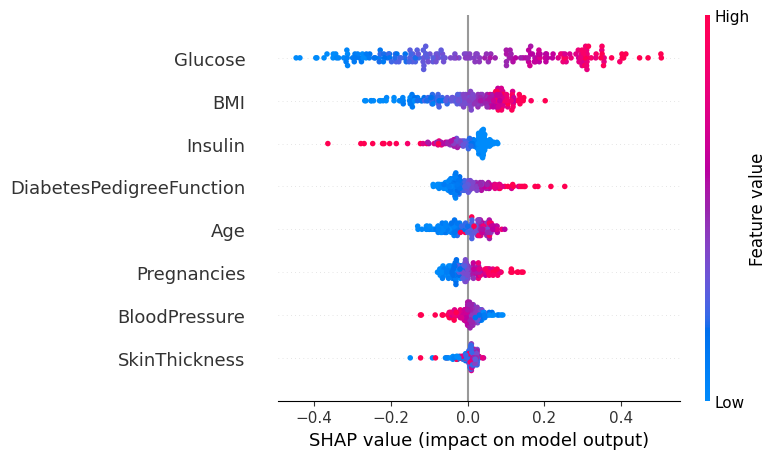

In [66]:
shap.summary_plot(shap_values, X_test_full, feature_names=feature_names)


In [67]:
!pip install xgboost


In [68]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_full, y_train)

y_pred_xgb = xgb.predict_proba(X_test_full)[:, 1] >= 0.3  # use same threshold
y_pred_xgb = y_pred_xgb.astype(int)

# Evaluate
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Precision: {precision:.2f}")
print(f"XGBoost Recall:    {recall:.2f}")
print(f"XGBoost F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:16:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Precision: 0.74
XGBoost Recall:    0.93
XGBoost F1 Score:  0.82
Confusion Matrix:
[[66 33]
 [ 7 94]]


In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_full, y_train)

y_pred_rf = rf.predict_proba(X_test_full)[:, 1] >= 0.3  # same threshold
y_pred_rf = y_pred_rf.astype(int)

# Evaluate


In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_full, y_train)

y_pred_rf = rf.predict_proba(X_test_full)[:, 1] >= 0.3  # same threshold
y_pred_rf = y_pred_rf.astype(int)

# Evaluate
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

print(f"RF Precision: {precision:.2f}")
print(f"RF Recall:    {recall:.2f}")
print(f"RF F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


RF Precision: 0.69
RF Recall:    0.97
RF F1 Score:  0.80
Confusion Matrix:
[[54 45]
 [ 3 98]]


In [71]:
probs_nn = model.predict(X_test_full).flatten()
probs_rf = rf.predict_proba(X_test_full)[:, 1]
probs_xgb = xgb.predict_proba(X_test_full)[:, 1]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [72]:
ensemble_probs = (probs_nn + probs_rf + probs_xgb) / 3
ensemble_preds = (ensemble_probs >= 0.3).astype(int)


In [73]:
precision = precision_score(y_test, ensemble_preds)
recall = recall_score(y_test, ensemble_preds)
f1 = f1_score(y_test, ensemble_preds)
cm = confusion_matrix(y_test, ensemble_preds)

print(f"Ensemble Precision: {precision:.2f}")
print(f"Ensemble Recall:    {recall:.2f}")
print(f"Ensemble F1 Score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)


Ensemble Precision: 0.71
Ensemble Recall:    0.97
Ensemble F1 Score:  0.82
Confusion Matrix:
[[59 40]
 [ 3 98]]
